<a href="https://colab.research.google.com/github/FilipposMoscholios/Employees-Complaints-Analysis/blob/main/EMPLOYEES_COMPLAINTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# URL and way to get the id part of the file
link_cand = "https://drive.google.com/file/d/1h9rggATilaOBseCa7Wm98_lpOL_xozAl/view?usp=drive_link"

id = link_cand.split("/")[-2]

downloaded = drive.CreateFile({'id':id})

downloaded.GetContentFile('EmployeeComplaints.csv')

In [3]:
df = pd.read_csv('EmployeeComplaints.csv')

## COMPLAINTS Dataset

In [5]:
df.head(5)

,Genre,Report,Employee Age,Employee Role,Gender
0,Communication Issues,I never receive clear instructions for my tasks.,46,Senior,Male
1,Communication Issues,Updates from management are inconsistent and c...,21,Intern,Female
2,Communication Issues,I often misunderstand what's expected due to v...,49,Senior,Male
3,Communication Issues,Important information is never shared on time.,36,Junior,Male
4,Communication Issues,"My queries go unanswered, making it hard to pr...",24,Intern,Female


### Dataset better format

In [ ]:
df = df.rename(columns={'Employee Age': 'Employee_Age', 'Employee Role': 'Employee_Role'})

### EDA On Complaints Dataset

Lets observe which employee role has more complaints

<Axes: title={'center': 'Number of complaints per Role'}>

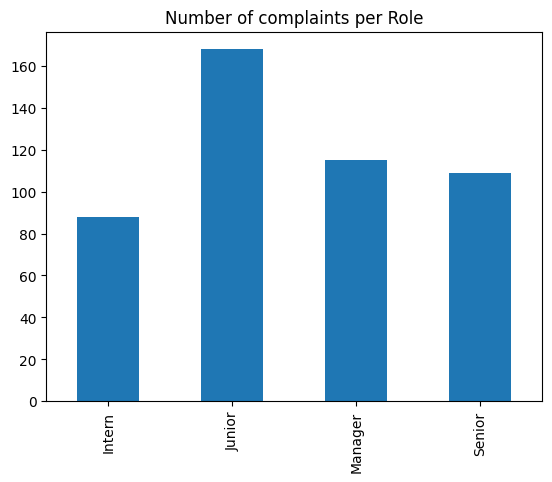

In [ ]:
df.groupby('Employee_Role')['Report'].count().plot.bar(title='Number of complaints per Role',xlabel='')

In [ ]:
from numpy.core.fromnumeric import size
def extract_gender_balance_per_complaints(plot_name,x_axis_to_explore, dataset, axis_state):
  colors = ("green", "brown")
  fig, ax = plt.subplots(1, figsize=(20,7))
  sns.countplot(x=x_axis_to_explore,hue='Gender', ax=ax,data=dataset,palette=colors, order =['Intern','Junior', 'Senior', 'Manager'])
  ax.set_title(f"{plot_name}", fontsize = 40, weight='bold')
  ax.set_ylabel("number of complaints")
  ax.set_xlabel("")
  ax.grid(False)
  if axis_state == True:
    ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
    ax.set_yticklabels("")
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(dataset.Gender))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',fontsize=22)
  return plt.show()

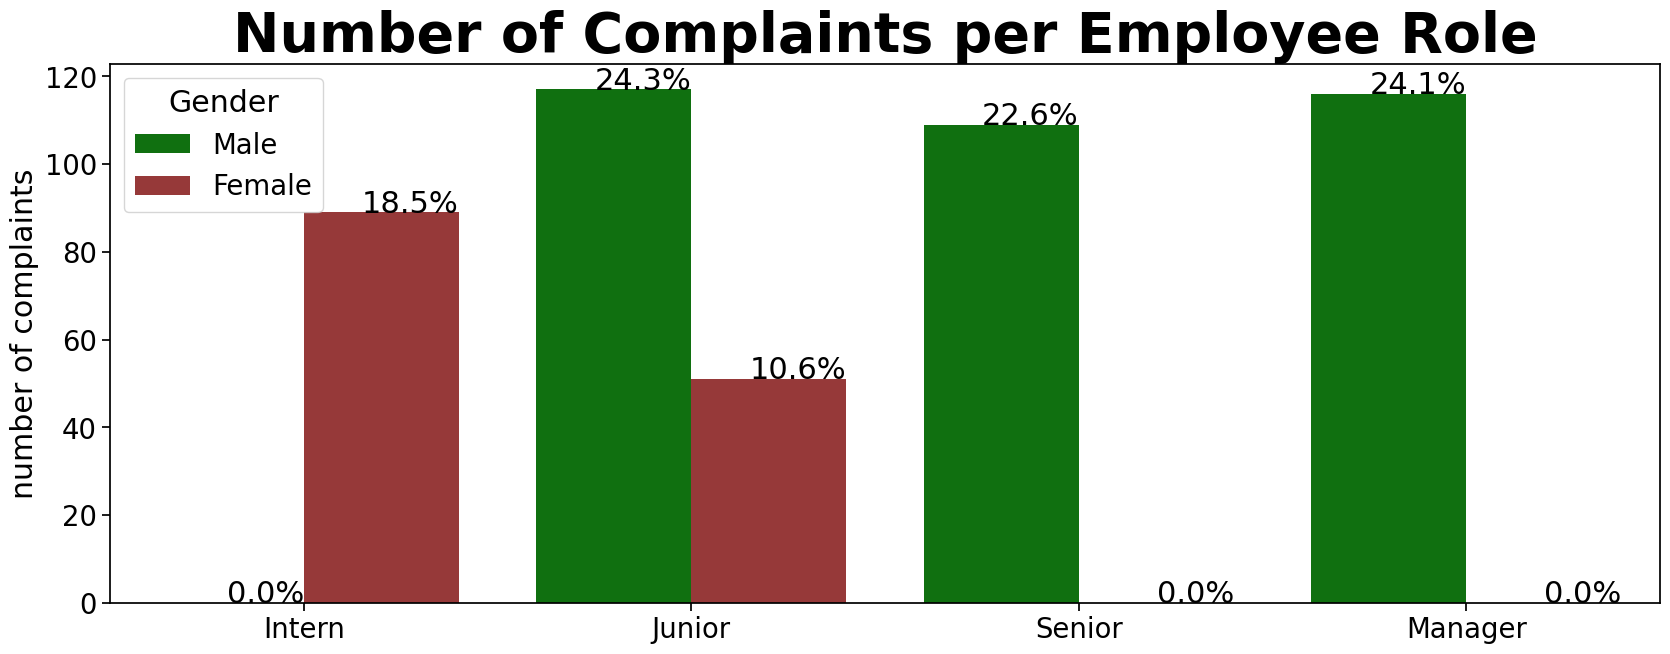

In [ ]:
with sns.plotting_context('notebook', font_scale = 1.8):
  extract_gender_balance_per_complaints('Number of Complaints per Employee Role',df.Employee_Role, df, 0)

Depict the above with a graph and also try to embed as information the gender per employee

Observe which gender complaints more

In [ ]:
df.groupby('Gender')['Report'].count()

Gender
Female    139
Male      341
Name: Report, dtype: int64

In [ ]:
df.Genre.unique()

array(['Communication Issues', 'Workload and Stress',
       'Management Lifestyle', 'Compensation and Benefits',
       'Career Development', 'Workplace Environment',
       'Lack of training and development'], dtype=object)

In [ ]:
df.groupby('Genre')['Report'].count()

Genre
Career Development                   29
Communication Issues                100
Compensation and Benefits            29
Lack of training and development     70
Management Lifestyle                100
Workload and Stress                 100
Workplace Environment                52
Name: Report, dtype: int64

In [ ]:
from numpy.core.fromnumeric import size
def extract_complaints_balance(plot_name,x_axis_to_explore, dataset, axis_state):
  colors = ("pink", "yellow", "orange", "red")
  fig, ax = plt.subplots(1, figsize=(20,7))
  sns.countplot(x=x_axis_to_explore,hue='Employee_Role', ax=ax,data=dataset,palette=colors, edgecolor='black')
  ax.set_title(f"{plot_name}", fontsize = 40, weight='bold')
  ax.set_facecolor('gainsboro')
  ax.set_ylabel("number of complaints")
  ax.set_xlabel("")
  ax.grid(False)
  ax.tick_params(axis='x', rotation = 45, labelsize = 22)
  return plt.show()

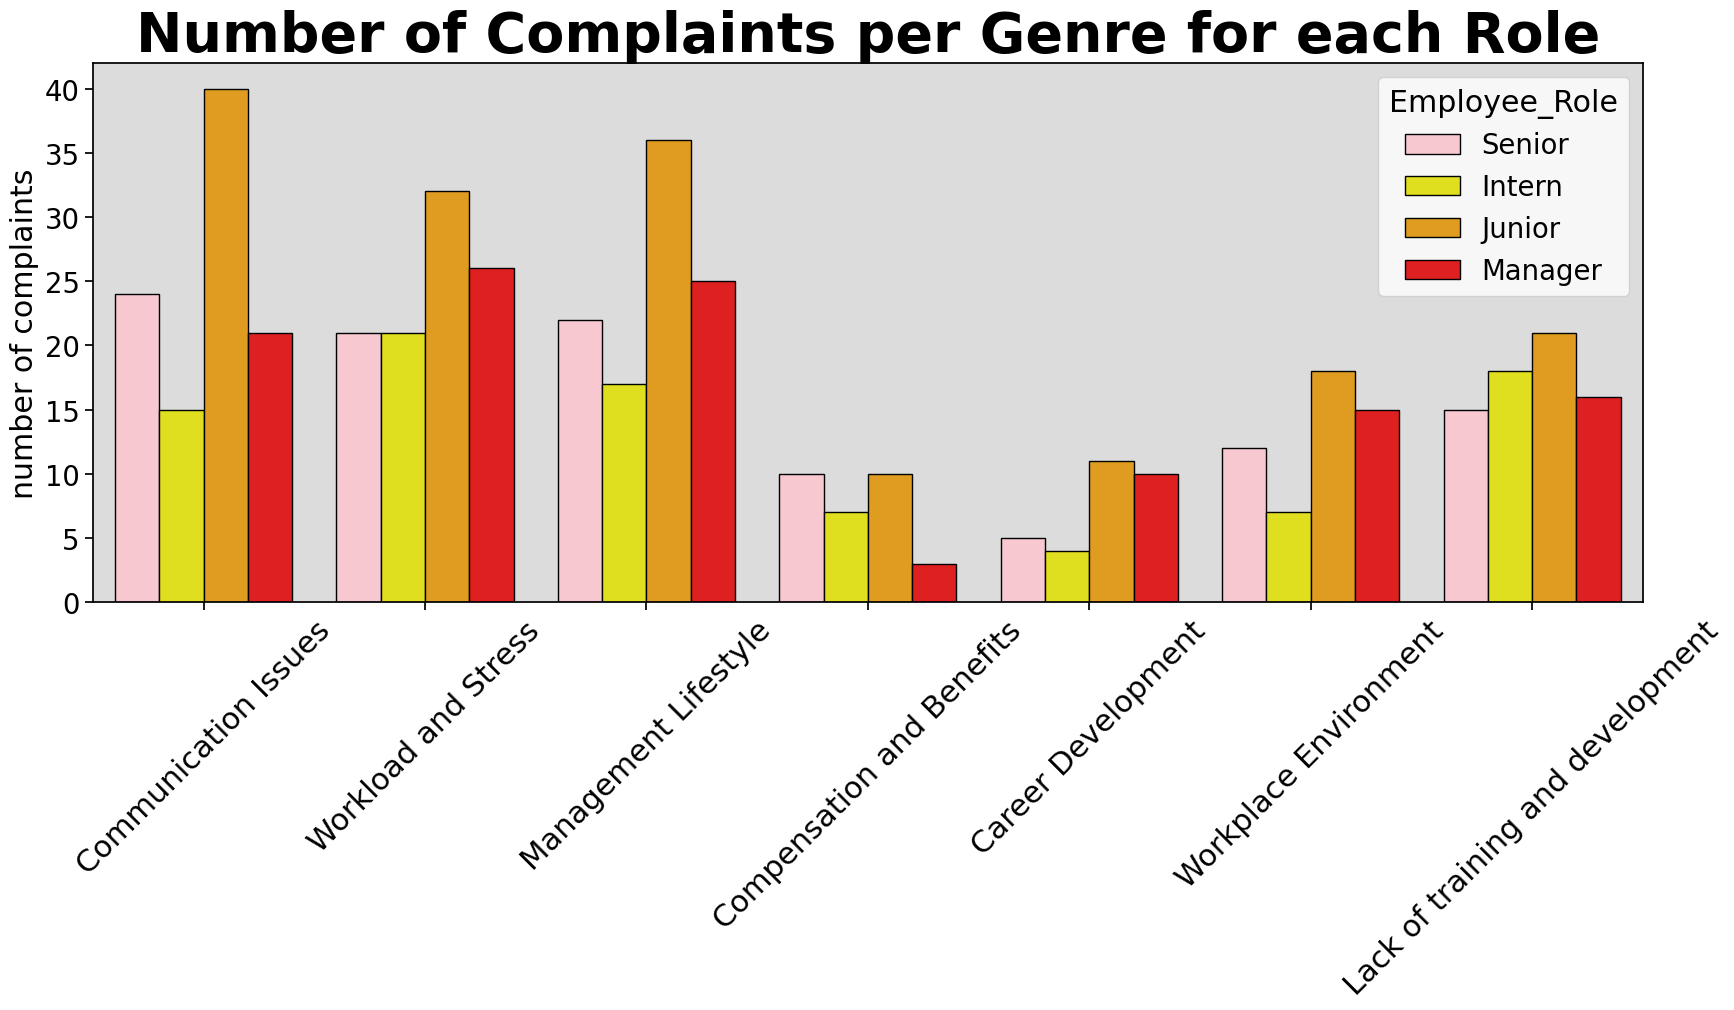

In [ ]:
with sns.plotting_context('notebook', font_scale = 1.8):
  extract_complaints_balance('Number of Complaints per Genre for each Role',df.Genre, df, 0)

Examine the ages

In [ ]:
df.Employee_Age.unique()

array([46, 21, 49, 36, 24, 44, 38, 59, 42, 52, 41, 47, 48, 29, 32, 18, 33,
       30, 60, 25, 43, 27, 58, 57, 22, 19, 37, 26, 31, 45, 39, 35, 51, 50,
       28, 54, 56, 23, 40, 53, 34, 20, 55])

In [ ]:
#df.groupby('Employee_Age')['Report'].count()

minimum age 18 maximum 60, so group them in 6 groups and examine further by constructing new categories

In [ ]:
age_intervals = [18, 25, 32, 39, 46, 53, 60]

In [ ]:
age_cat=[]
for i in df.Employee_Age:
  if i>= 18 and i<25:
    age_cat.append('A')
  elif i>=25 and i<32:
    age_cat.append('B')
  elif i>=32 and i<39:
    age_cat.append('C')
  elif i>=39 and i<46:
    age_cat.append('D')
  elif i>=42 and i<53:
    age_cat.append('E')
  elif i>=53 and i<=60:
    age_cat.append('F')

In [ ]:
#age_cat

In [ ]:
df['Age_Groups'] = age_cat

In [ ]:
df

,Genre,Report,Employee_Age,Employee_Role,Gender,Age_Groups
0,Communication Issues,I never receive clear instructions for my tasks.,46,Senior,Male,E
1,Communication Issues,Updates from management are inconsistent and c...,21,Intern,Female,A
2,Communication Issues,I often misunderstand what's expected due to v...,49,Senior,Male,E
3,Communication Issues,Important information is never shared on time.,36,Junior,Male,C
4,Communication Issues,"My queries go unanswered, making it hard to pr...",24,Intern,Female,A
...,...,...,...,...,...,...
477,Lack of training and development,Opportunities for job rotation and diversifica...,19,Intern,Female,A
478,Lack of training and development,Leadership doesn't recognize employees' aspira...,18,Intern,Female,A
479,Lack of training and development,Employees feel unsupported in their pursuit of...,19,Intern,Female,A
480,Lack of training and development,No structured program for mentoring new employ...,47,Senior,Male,E


In [ ]:
df.groupby('Age_Groups')['Report'].count()

Age_Groups
A    88
B    75
C    80
D    81
E    74
F    82
Name: Report, dtype: int64

number of complaints per gender for each age group

In [ ]:
from numpy.core.fromnumeric import size
def extract_complaints_balance(plot_name,x_axis_to_explore, dataset, axis_state):
  colors = ("cyan", "lightblue", "darkcyan", "darkslategrey","royalblue", "blue")
  fig, ax = plt.subplots(1, figsize=(20,7))
  sns.countplot(x=x_axis_to_explore,hue='Age_Groups', ax=ax,data=dataset,palette=colors, edgecolor='black', hue_order=['A','B','C','D','E','F'])
  ax.set_title(f"{plot_name}", fontsize = 40, weight='bold')
  ax.legend(title='Age Groups', loc='upper right', labels=['18-25', '25-32', '32-39', '39-46', '46-53', '53-60'])
  ax.set_facecolor('gainsboro')
  ax.set_ylabel("number of complaints")
  ax.set_xlabel("")
  ax.grid(False)
  ax.tick_params(axis='x', labelsize = 22)
  return plt.show()

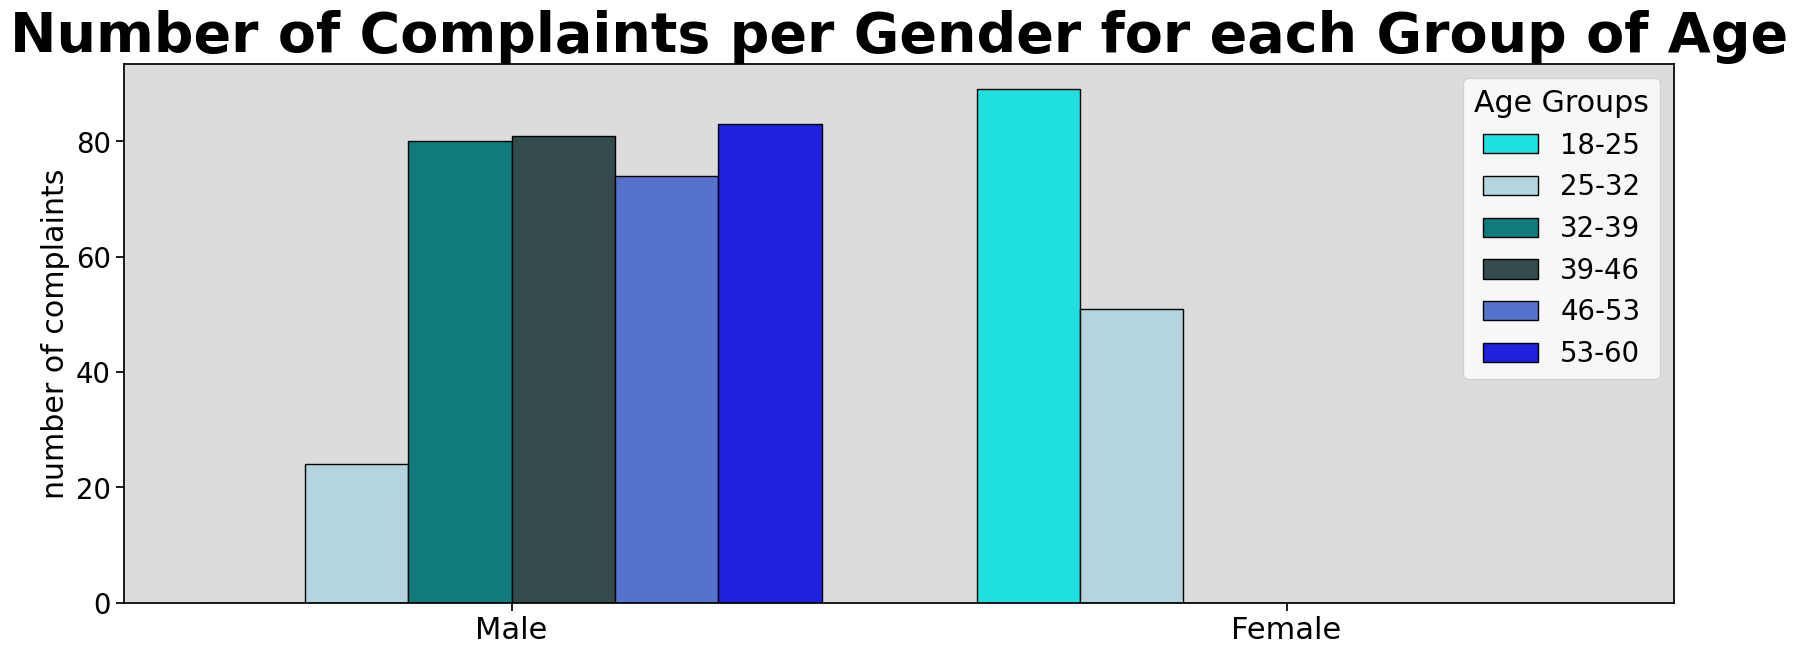

In [ ]:
with sns.plotting_context('notebook', font_scale = 1.8):
  extract_complaints_balance('Number of Complaints per Gender for each Group of Age',df.Gender, df, 0)

WORDCLOUD OF THE ABOVE CATEGORIES AND AND THE RESPECTIVE COMPLAINTS, HENCE THE WORDS THAT APPEAR MOST ON THE RESPECTIVE GENRE

In [ ]:
#df[df['Genre']== list_of_genre[0]]['Report']

0      I never receive clear instructions for my tasks.
1     Updates from management are inconsistent and c...
2     I often misunderstand what's expected due to v...
3        Important information is never shared on time.
4     My queries go unanswered, making it hard to pr...
                            ...                        
95    No provisions for managing peaks in communicat...
96      Team discussions lack engagement from managers.
97    Communication tools lack proper organization f...
98    No support for addressing stress caused by com...
99    Leadership does not actively encourage open di...
Name: Report, Length: 100, dtype: string

In [ ]:
#wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(str(df[df['Genre']== list_of_genre[0]]['Report']))
#plt.figure()
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

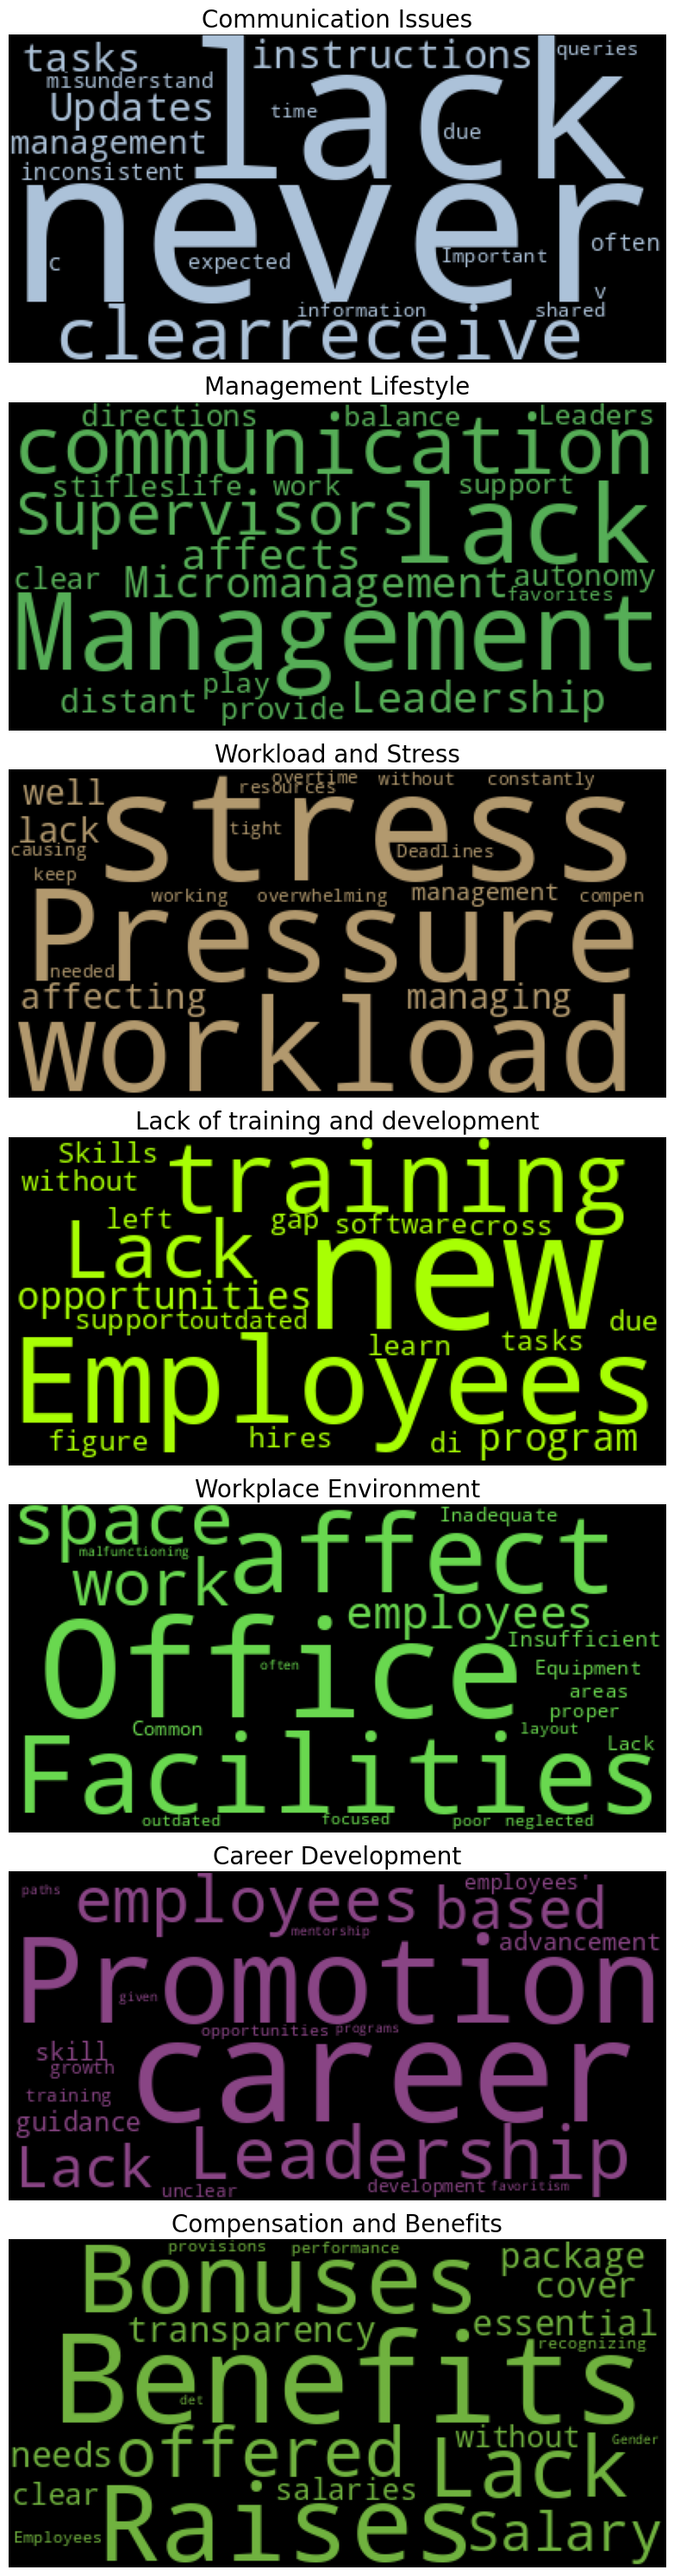

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  collocations=False,
                  background_color='black',
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
list_of_genre = ['Communication Issues', 'Management Lifestyle', 'Workload and Stress', 'Lack of training and development',
                 'Workplace Environment', 'Career Development', 'Compensation and Benefits']

fig, axes = plt.subplots(7, 1, figsize=(60,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    cloud.generate(str(df[df['Genre']== list_of_genre[i]]['Report']))
    plt.gca().imshow(cloud)
    plt.gca().set_title(list_of_genre[i], fontdict=dict(size=20))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Installations

In [ ]:
pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=eb678d9ca2de879424e3358937785fb99f0ca1dab2482988289421bc0d7683ad
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
pip install adjustText

In [ ]:
pip install colorama

In [ ]:
pip install stopwordsiso

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade gensim

In [ ]:
!pip install gensim==4.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-4.1.0-cp310-cp310-linux_x86_64.whl size=25996774 sha256=e98f6001d7a45dcb23cb624f288d61dc7fafb1df380583bb8c725012b523832a
  Stored in directory: /root/.cache/pip/wheels/9c/bf/07/ff115a906f00f4538a66ababeeca5f87275e6de03889c077ff
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2


In [ ]:
pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552451 sha256=da322818b442d3b7b52b62879b25980a1bf04af29a00c452055cb508bd83f731
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


### import libraries and modules

In [ ]:
import nltk
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from sklearn.decomposition import LatentDirichletAllocation
#from __future__ import division
from nltk.corpus import stopwords
import spacy
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import stopwordsiso as stopwords
from pprint import pprint
import warnings
import pyLDAvis.gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors
from gensim.similarities.annoy import AnnoyIndexer
import gensim.models
from colorama import Fore, Style
from adjustText import adjust_text
import plotly
import plotly.graph_objs as go




warnings.filterwarnings("ignore",category=DeprecationWarning)

pyLDAvis.enable_notebook()

In [ ]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df.head()

,Genre,Report,Employee_Age,Employee_Role,Gender,Age_Groups
0,Communication Issues,I never receive clear instructions for my tasks.,46,Senior,Male,E
1,Communication Issues,Updates from management are inconsistent and c...,21,Intern,Female,A
2,Communication Issues,I often misunderstand what's expected due to v...,49,Senior,Male,E
3,Communication Issues,Important information is never shared on time.,36,Junior,Male,C
4,Communication Issues,"My queries go unanswered, making it hard to pr...",24,Intern,Female,A


In [ ]:
df["Report"] = df["Report"].astype('string')


In [ ]:
df.Report

0       I never receive clear instructions for my tasks.
1      Updates from management are inconsistent and c...
2      I often misunderstand what's expected due to v...
3         Important information is never shared on time.
4      My queries go unanswered, making it hard to pr...
                             ...                        
477    Opportunities for job rotation and diversifica...
478    Leadership doesn't recognize employees' aspira...
479    Employees feel unsupported in their pursuit of...
480    No structured program for mentoring new employ...
481    Lack of training programs affects our competit...
Name: Report, Length: 480, dtype: object

In [ ]:
df.Report.isnull().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
# prepare the corpus
def corpus_preparation(dataset):
  stop_words_corp = stopwords.stopwords('english')

  reports  = dataset
  removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM', 'VERB']
  tokens = []
  nlp = spacy.load("en_core_web_sm")

  for summary in nlp.pipe(reports['Report']):
    proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
    tokens.append(proj_tok)

# Add tokens to new column
  reports['tokens'] = tokens

  data = reports['tokens'].astype('str')
  # Remove Emails
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

  # Remove new line characters
  data = [re.sub('\s+', ' ', sent) for sent in data]

  # Remove distracting single quotes
  data = [re.sub("\'", "", sent) for sent in data]
  def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

  data_words = list(sent_to_words(data))
  bigram = gensim.models.Phrases(data_words, min_count=1, threshold=100) # higher threshold fewer phrases.
# Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)

  def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words_corp] for doc in texts]

  def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

  def lemmatization(texts, allowed_postags=['NOUN','ADJ','VERB','ADV']):
    """https://spacy.io/api/annotation"""
    nlp = spacy.load("en_core_web_sm")
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
  # Remove Stop Words
  data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
  data_words_bigrams = make_bigrams(data_words_nostops)
  # Initialize spacy 'el_core_news_sm' model, keeping only tagger component (for efficiency)

# Do lemmatization keeping only noun
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ','VERB','ADV'])
  # Create Dictionary

  id2word = corpora.Dictionary(data_lemmatized)
  id2word.filter_extremes(no_below=3, no_above=0.5, keep_n=70000)
# Create Corpus
  texts = data_lemmatized

# Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]
  return(corpus, id2word, data_lemmatized)

In [ ]:
corp_begin, id2word_begin, data_lemmatized_begin = corpus_preparation(df)


#### Function to build the LDA Model and visualize the topics

In [ ]:
# creation of lda model and visualize the produced topics
def LDA_model_and_Visualization(Corpus, Id2word, Nunmber_of_topics, number_of_passes):
  LDA_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                           id2word=Id2word,
                                           num_topics=Nunmber_of_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=300,
                                           passes=number_of_passes,
                                           alpha='auto',
                                           per_word_topics=True)
  pyLDAvis.enable_notebook()

  visualization = pyLDAvis.gensim.prepare(LDA_model, Corpus, Id2word)

  return(LDA_model, LDA_model.print_topics(),visualization)

## Step 1: Run LDA with (u_mass) measure and tune the number of topics.

In [ ]:
#function
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word_begin, chunksize = 100, passes = 100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_begin, corpus=corp_begin, texts=data_lemmatized_begin, start=2, limit=60, step=2)

## Step 2: Choose the optimal number of topic based on the minimum u_mass score, observing also if the given number of topic produce topics with overlapping descriptive words.

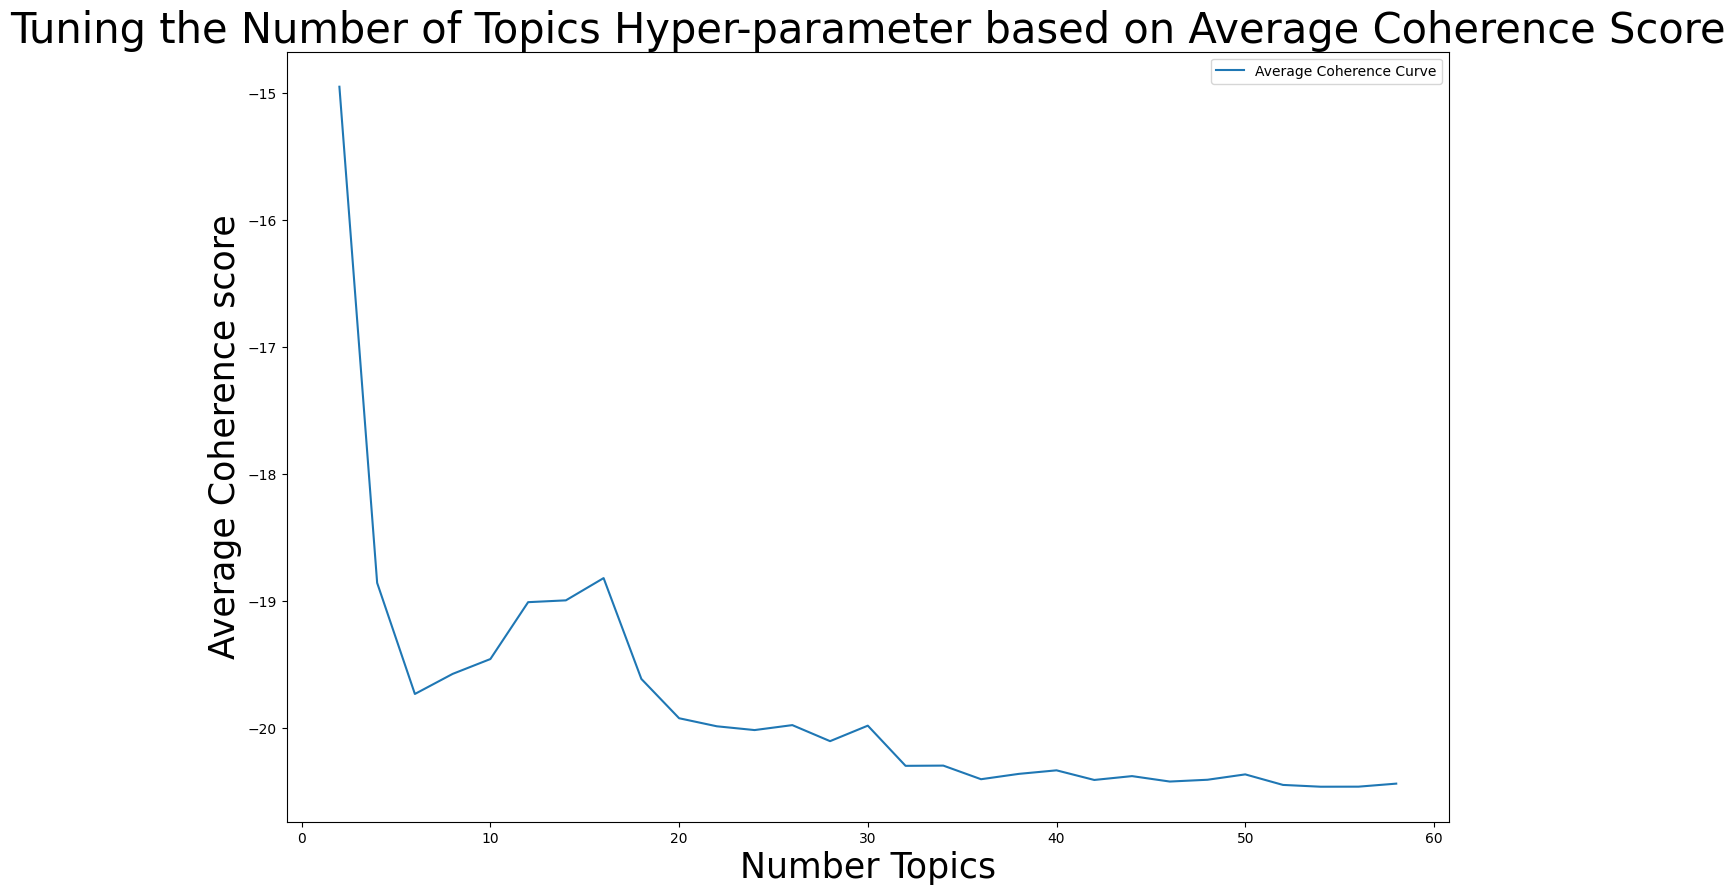

In [ ]:
limit=60; start=2; step=2;
x = range(start, limit, step)
plt.figure(figsize=(15, 10))
plt.plot(x, coherence_values)
plt.title("Tuning the Number of Topics Hyper-parameter based on Average Coherence Score",fontsize=30)
plt.xlabel("Number Topics", fontsize= 25)
plt.ylabel("Average Coherence score", fontsize= 25)
plt.legend(["Average Coherence Curve"])
plt.show()

In [ ]:
model, produced_topics, topics_visualization=LDA_model_and_Visualization(corp_begin, id2word_begin, 6, 200)


/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


In [ ]:
model.show_topics(formatted=False, num_topics=40)

[(0,
  [('leadership', 0.16642414),
   ('employee', 0.0948956),
   ('skill', 0.0882454),
   ('opportunity', 0.082706556),
   ('lack', 0.06633312),
   ('development', 0.06543951),
   ('new', 0.056836028),
   ('promotion', 0.035008993),
   ('professional', 0.030454094),
   ('growth', 0.026180662)]),
 (1,
  [('communication', 0.081048116),
   ('task', 0.0770886),
   ('team', 0.07708443),
   ('proper', 0.06527871),
   ('performance', 0.056151327),
   ('workload', 0.051114097),
   ('training', 0.027750589),
   ('common', 0.027427988),
   ('goal', 0.027409079),
   ('gap', 0.024830516)]),
 (2,
  [('program', 0.06777472),
   ('time', 0.06500579),
   ('clear', 0.06430283),
   ('benefit', 0.06286584),
   ('change', 0.049240593),
   ('raise', 0.045215946),
   ('facility', 0.045183025),
   ('avenue', 0.03838663),
   ('transparency', 0.038384665),
   ('different', 0.0355398)]),
 (3,
  [('supervisor', 0.13831788),
   ('work', 0.10968121),
   ('manager', 0.07203658),
   ('decision', 0.057832547),
   

In [ ]:
topics_visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.027755  0.271936       1        1  21.794963
0     -0.287862  0.078927       2        1  21.072157
1      0.142576  0.021855       3        1  18.349992
4     -0.188534 -0.199254       4        1  14.315990
3      0.159609 -0.007958       5        1  13.516319
2      0.146456 -0.165507       6        1  10.950578, topic_info=           Term       Freq      Total Category  logprob  loglift
58     employee  58.000000  58.000000  Default  30.0000  30.0000
80   leadership  42.000000  42.000000  Default  29.0000  29.0000
37         lack  61.000000  61.000000  Default  28.0000  28.0000
31   supervisor  23.000000  23.000000  Default  27.0000  27.0000
4    management  28.000000  28.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
140    industry   1.297296   4.346639   Topic6  -4.6180   1.0027
139     outdate   1.298947   4.640969   Topic6  -4.6167   0.9384
42    effective   0.784526   3.555106   Topic6  -5.1210   0.7007
48     conflict   0.782317   3.702865   Topic6  -5.1238   0.6572
67     workload   2.845567  25.383703   Topic6  -3.8325   0.0234

[226 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
121       1  0.928786      ability
60        6  0.704842  achievement
102       1  0.867489     adequate
124       2  0.812486  advancement
133       3  0.517123         area
...     ...       ...          ...
41        1  0.368949         work
41        5  0.603735         work
67        1  0.433349     workload
67        3  0.433349     workload
67        6  0.118186     workload

[195 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 2, 5, 4, 3])

In [ ]:
num_of_words_in_topc=6
topic_words=[]
for topic in range(num_of_words_in_topc):
  for row in range(10):
    topic_words.append(model.show_topic(topic, topn=10)[row][0])

In [ ]:
topics=[topic_words[:10], topic_words[10:20], topic_words[20:30], topic_words[30:40], topic_words[40:50],
        topic_words[50:60]]

In [ ]:
model_before_event = gensim.models.Word2Vec(sentences=data_lemmatized_begin, window=5, min_count=3,  workers=4,vector_size=100)
word_vectors_begin = model_before_event.wv

In [ ]:
def centroid_calculation(topic_w):
  centroid_calc = np.average([word_vectors_begin[w] for w in  topic_w], axis=0)
  centroid = word_vectors_begin.similar_by_vector(centroid_calc)
  return centroid

In [ ]:
topic1_centroid = centroid_calculation(topic_words[:10])
topic2_centroid = centroid_calculation(topic_words[10:20])
topic3_centroid = centroid_calculation(topic_words[20:30])
topic4_centroid = centroid_calculation(topic_words[30:40])
topic5_centroid = centroid_calculation(topic_words[40:50])
topic6_centroid = centroid_calculation(topic_words[50:60])



In [ ]:
topic1_centroid, topic2_centroid, topic3_centroid, topic4_centroid, topic5_centroid, topic6_centroid

([('leadership', 0.40552347898483276),
  ('lack', 0.3979042172431946),
  ('growth', 0.36946621537208557),
  ('skill', 0.3527933955192566),
  ('promotion', 0.328180730342865),
  ('opportunity', 0.3250889182090759),
  ('new', 0.3171760141849518),
  ('professional', 0.29766011238098145),
  ('development', 0.28271421790122986),
  ('error', 0.27759578824043274)],
 [('workload', 0.4539158344268799),
  ('team', 0.42669281363487244),
  ('communication', 0.4051077663898468),
  ('proper', 0.37239760160446167),
  ('task', 0.36395150423049927),
  ('common', 0.36115962266921997),
  ('goal', 0.33405086398124695),
  ('performance', 0.2666374742984772),
  ('meeting', 0.2623240351676941),
  ('gap', 0.2615031599998474)],
 [('benefit', 0.5029220581054688),
  ('different', 0.47819820046424866),
  ('transparency', 0.35193952918052673),
  ('avenue', 0.32974401116371155),
  ('work', 0.32065051794052124),
  ('clear', 0.31263047456741333),
  ('time', 0.30952829122543335),
  ('facility', 0.3092963397502899),
  

In [ ]:
most_similar_centroid_df = pd.DataFrame([topic1_centroid[0][0],topic2_centroid[0][0],topic3_centroid[0][0],topic4_centroid[0][0],topic5_centroid[0][0],topic6_centroid[0][0]])
most_similar_centroid_df.rename(columns = {0 : 'centroid_word'}, inplace = True)
most_similar_centroid_df.drop_duplicates(ignore_index=True,inplace=True)

In [ ]:
model_before_event = gensim.models.Word2Vec(sentences=data_lemmatized_begin, window=5, min_count=3,  workers=4,vector_size=100)
word_vectors_begin = model_before_event.wv

# fit a 2d PCA model to the vectors

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(data_lemmatized_begin, vector_size=100, min_count=1)

### K-Means to compare further the produced topics and treat the topics as clusters

In [ ]:
pip install gensim==3.8.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects


In [ ]:
vocab_len = len(model.wv)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
def mbkmeans_clusters(
	X,
    k,
    mb,
    print_silhouette_values,
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [ ]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

vectorized_docs = vectorize(data_lemmatized_begin, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(480, 100)

In [ ]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=30,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": df["Report"].values,
    "tokens": [" ".join(text) for text in data_lemmatized_begin],
    "cluster": cluster_labels
})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 30
Silhouette coefficient: 0.04
Inertia:0.37976515082530027
Silhouette values:
    Cluster 23: Size:2 | Avg:1.00 | Min:1.00 | Max: 1.00
    Cluster 3: Size:2 | Avg:1.00 | Min:1.00 | Max: 1.00
    Cluster 7: Size:2 | Avg:0.35 | Min:0.29 | Max: 0.41
    Cluster 5: Size:6 | Avg:0.29 | Min:0.16 | Max: 0.37
    Cluster 28: Size:6 | Avg:0.28 | Min:0.17 | Max: 0.37
    Cluster 17: Size:4 | Avg:0.28 | Min:0.20 | Max: 0.34
    Cluster 20: Size:8 | Avg:0.22 | Min:0.11 | Max: 0.34
    Cluster 24: Size:2 | Avg:0.16 | Min:-0.00 | Max: 0.33
    Cluster 22: Size:8 | Avg:0.15 | Min:0.05 | Max: 0.23
    Cluster 18: Size:14 | Avg:0.13 | Min:0.07 | Max: 0.27
    Cluster 11: Size:9 | Avg:0.11 | Min:-0.06 | Max: 0.21
    Cluster 19: Size:23 | Avg:0.10 | Min:0.01 | Max: 0.23
    Cluster 25: Size:11 | Avg:0.09 | Min:-0.02 | Max: 0.18
    Cluster 12: Size:11 | Avg:0.09 | Min:-0.07 | Max: 0.25
    Cluster 21: Size:5 | Avg:0.09 | Min:-0.10 | Max: 0.29
    Cluster 9: Size:3 | Avg:0.09 | Min:0.01

In [ ]:
print("Most representative terms per cluster (based on centroids):")
for i in range(30):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: workload adequate objective unsupported break 
Cluster 1: leadership break skill communication gender 
Cluster 2: decision input life_balance work communication 
Cluster 3: creativity micromanagement issue good aspiration 
Cluster 4: management overtime rumor heavy unappreciated 
Cluster 5: time tool workload objective break 
Cluster 6: lack training meeting uneven potential 
Cluster 7: benefit competitive presence life_balance acquisition 
Cluster 8: supervisor career layout uneven hire 
Cluster 9: development leader investment leadership bonus 
Cluster 10: performance raise productivity metric family 
Cluster 11: task pressure unclear resource target 
Cluster 12: manager worker breakdown noticeable remote 
Cluster 13: company update performance noisy slow_productivity 
Cluster 14: career layout unsure growth personal 
Cluster 15: task inadequate_privacy treatment stress ownership 
Cluster 16: work recognition supe

In [ ]:
test_cluster = 23
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:3]:
    print(df["Report"].values[d])
    print("-------------")

Facilities are not properly cleaned or sanitized.
-------------
Facilities are not properly cleaned or sanitized.
-------------
Facilities don't cater to employees with diverse needs.
-------------


In [ ]:
from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors

vectors = model_before_event.wv.vectors
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(vectors)

# prepare a dataframe
words = pd.DataFrame(vectors)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]

In [ ]:
from sklearn.cluster import KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


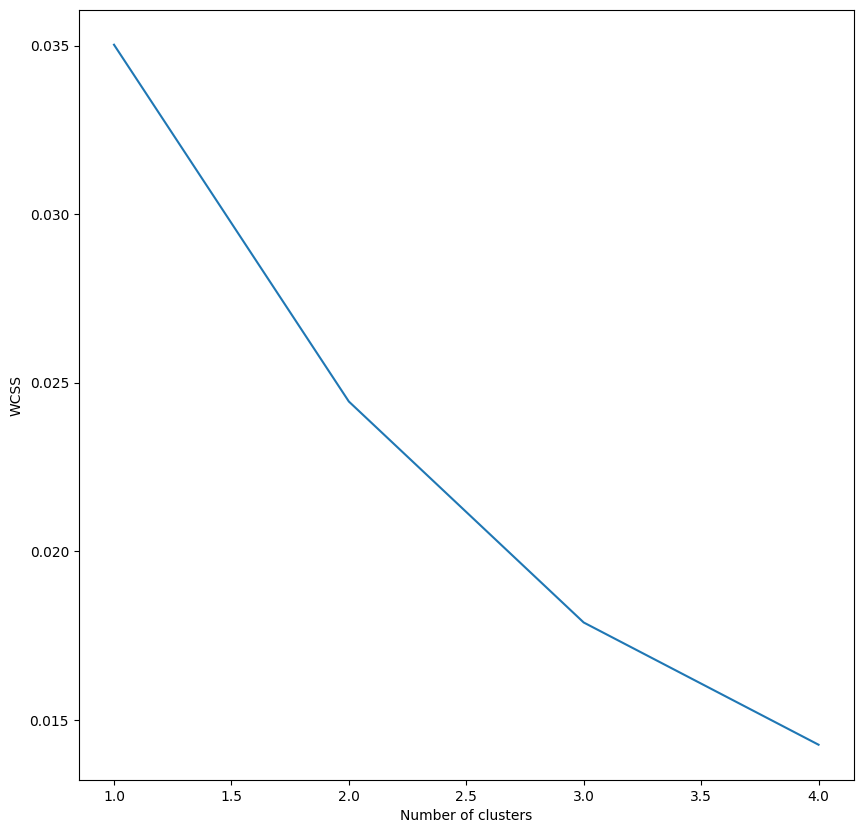

In [ ]:
wcss = []
for i in range(1,5):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(PCA_data_complet)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,5), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

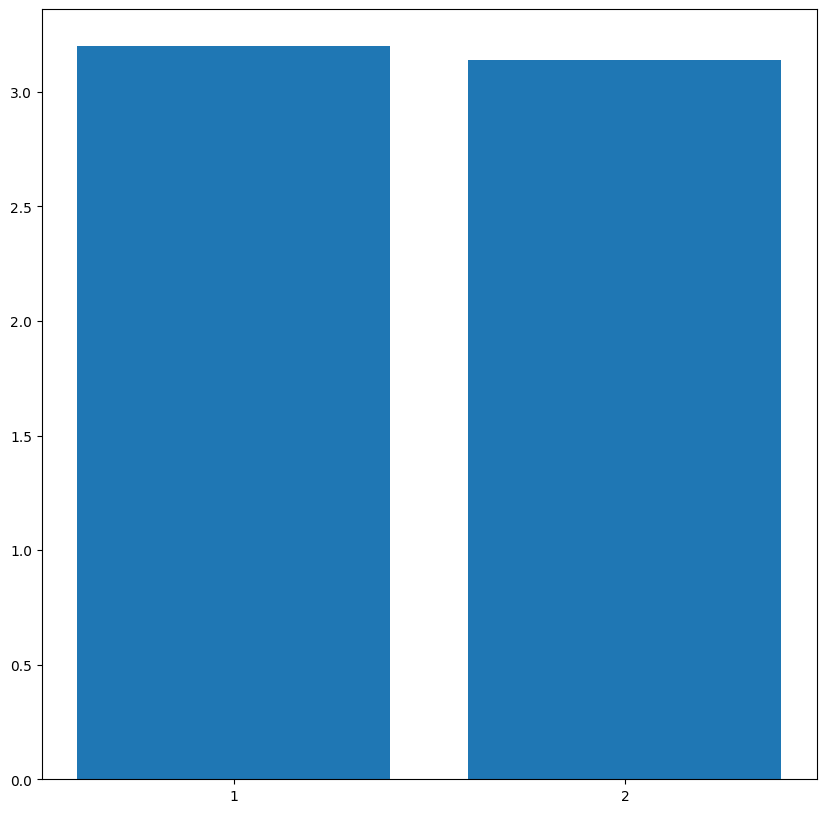

In [ ]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 2)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


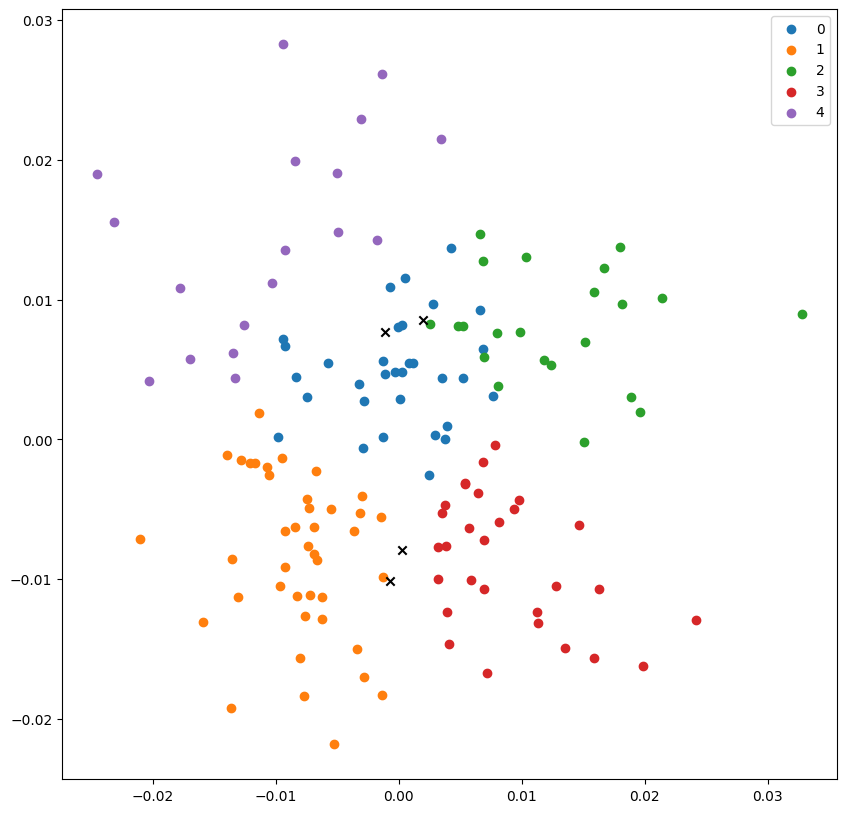

In [ ]:
centers = np.array(model.cluster_centers_)
model2 = KMeans(n_clusters = 5, init = "k-means++")
label = model2.fit_predict(PCA_final[['word','x_values','y_values']])
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(PCA_result.iloc[label == i, 0] , PCA_result.iloc[label == i, 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

# Plot topic clusters within word embeddings with closest neighbours

In [ ]:
input_word = most_similar_centroid_df.values
sentiment_color = ['grey','red','green', 'black']
color_list = ['brown','violet', 'seagreen', 'peru', 'orange']
#representatives_text_size = [0.08, 0.2, 0.08, 0.06, 0.07]

def prepare_vis(giv_word, model):# model= word_vectors_begin
  def append_list(sim_words, words):
    list_of_words = []
    for i in range(len(sim_words)):
      sim_words_list = list(sim_words[i])
      sim_words_list.append(words)
      sim_words_tuple = tuple(sim_words_list)
      list_of_words.append(sim_words_tuple)
    return list_of_words


  user_input = [x.strip() for x in giv_word.split(',')]

  result_word = []

  for words in user_input:

    sim_words = model.most_similar(words, topn = 10)
    sim_words = append_list(sim_words, words)

  result_word.extend(sim_words)

  similar_word = [word[0] for word in result_word]
  similarity = [word[1] for word in result_word]
  similar_word.extend(user_input)
  labels = [word[2] for word in result_word]
  label_dict = dict([(y,x+1) for x,y in enumerate(set(labels))])
  color_map = [label_dict[x] for x in labels]

  def retrieve_representatives_nn(resulted_nn_words):#just for visualization to add "+" next to word-nearest neighbors
    before_list=[]
    for i in range(10):
      before_list.append(resulted_nn_words[i][0])
    return before_list
  bfre_list_nn_words = retrieve_representatives_nn(result_word)

  return(bfre_list_nn_words, user_input, result_word, similar_word, similarity, labels, label_dict, color_map)

In [ ]:
def display_tsne_scatterplot_2D(given_word,color,sent_color,how_much_sentiment, model, user_input=None, words=None, label=None, color_map=None, perplexity = 5, learning_rate = 0, iteration = 0, topn=10, sample=500):
#### change how_much_sentiment to sentiment_intensity
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.index_to_key()), sample)
        else:
            words = [ word for word in model.index_to_key ]

    word_vectors = np.array([model[w] for w in words])


    # For 2D, change the three_dim variable into something like two_dim like the following:
    two_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:2]

    data = []


    count = 0
    if (given_word == user_input[0] or given_word == user_input[1] or given_word == user_input[2] or given_word == user_input[3]
        or given_word == user_input[4] or given_word == user_input[5]):
      for i in range (len(user_input)):

                trace = go.Scatter(
                    x = two_dim[count:count+topn,0],
                    y = two_dim[count:count+topn,1],
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 30,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': color
                    }

                )

                # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
                # variable three_dim, use the variable that we have declared earlier (e.g two_dim)

                data.append(trace)
                count = count+topn

    trace_input = go.Scatter(
                    x = two_dim[count:,0],
                    y = two_dim[count:,1],
                    text = words[count:],
                    name = 'Topic Representative',
                    textposition = "bottom center",
                    textfont_size = 40,
                    mode = 'markers+text',
                    marker = {
                        'size': 30,
                        'opacity': how_much_sentiment,
                        'color': sent_color
                    }
                    )

    # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable.  Also, instead of using
    # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
    data.append(trace_input)

# Configure the layout

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Times New Roman",
            size=25,
            color="black"
        )),
        font = dict(
            family = "Times New Roman",
            size = 35, color="black"),
        autosize = False,
        width = 1300,
        height = 650
        )


    plot_figure = go.Figure(data = data, layout = layout)
    return plot_figure.show()

In [ ]:
before_list_representative1_nn, user_input, result_word, similar_word, similarity, labels, label_dict, color_map = prepare_vis(input_word[0][0], word_vectors_begin)
display_tsne_scatterplot_2D(input_word[0][0],color_list[0],sentiment_color[3],1,word_vectors_begin, user_input, similar_word, labels, color_map, 7, 500, 10000)

In [ ]:
before_list_representative1_nn, user_input, result_word, similar_word, similarity, labels, label_dict, color_map = prepare_vis(input_word[1][0], word_vectors_begin)
display_tsne_scatterplot_2D(input_word[1][0],color_list[1],sentiment_color[3],1,word_vectors_begin, user_input, similar_word, labels, color_map, 7, 500, 10000)

In [ ]:
before_list_representative1_nn, user_input, result_word, similar_word, similarity, labels, label_dict, color_map = prepare_vis(input_word[2][0], word_vectors_begin)
display_tsne_scatterplot_2D(input_word[2][0],color_list[2],sentiment_color[3],1,word_vectors_begin, user_input, similar_word, labels, color_map, 7, 500, 10000)

In [ ]:
before_list_representative1_nn, user_input, result_word, similar_word, similarity, labels, label_dict, color_map = prepare_vis(input_word[3][0], word_vectors_begin)
display_tsne_scatterplot_2D(input_word[3][0],color_list[3],sentiment_color[3],1,word_vectors_begin, user_input, similar_word, labels, color_map, 7, 500, 10000)

In [ ]:
before_list_representative1_nn, user_input, result_word, similar_word, similarity, labels, label_dict, color_map = prepare_vis(input_word[4][0], word_vectors_begin)
display_tsne_scatterplot_2D(input_word[4][0],color_list[4],sentiment_color[3],1,word_vectors_begin, user_input, similar_word, labels, color_map, 7, 500, 10000)